 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")


whale_df = pd.read_csv(whale_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
whale_df.sort_index(ascending=True, inplace=True)

whale_df.head()


SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-02                        NaN                 NaN   
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-02                          NaN                     NaN  
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098

In [3]:
# Count nulls
whale_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_df.dropna(inplace=True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_returns_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
algo_df.sort_index(ascending=True, inplace=True)


In [6]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_df.dropna(inplace=True)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_history_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
sp500_df.sort_index(ascending=True, inplace=True)

sp500_df.head()

Close
Date                
2012-10-01  $1444.49
2012-10-02  $1445.75
2012-10-03  $1450.99
2012-10-04  $1461.40
2012-10-05  $1460.93

In [9]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types

sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype(float)

sp500_df.dtypes

sp500_df.head()



Close
Date               
2012-10-01  1444.49
2012-10-02  1445.75
2012-10-03  1450.99
2012-10-04  1461.40
2012-10-05  1460.93

In [11]:
# Calculate Daily Returns

sp_500_daily_returns = sp500_df.pct_change()


sp_500_daily_returns.head()

Close
Date                
2012-10-01       NaN
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322

In [12]:
# Drop nulls
sp_500_daily_returns.dropna(inplace=True)

In [13]:
# Rename Column
sp_500_daily_returns = sp_500_daily_returns.rename(columns={"Close":"S&P 500"})

sp_500_daily_returns.head()

S&P 500
Date                
2012-10-02  0.000872
2012-10-03  0.003624
2012-10-04  0.007174
2012-10-05 -0.000322
2012-10-08 -0.003457

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Concatenate all DataFrames into a single DataFrame
combined_df = pd.concat([whale_df, algo_df, sp_500_daily_returns], axis ="columns", join = "inner")
combined_df.head()




SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                    -0.000496               -0.006569 -0.001942   
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   

              Algo 2   S&P 500  
Date                            
2015-03-03 -0.000949 -0.004539  
2015-03-04  0.002416 -0.004389  
2015-03-05  0.004323  0.001196  
2015-03-06 -0.011460 -0.014174  
2015-03-09  0.001303  0.003944

---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

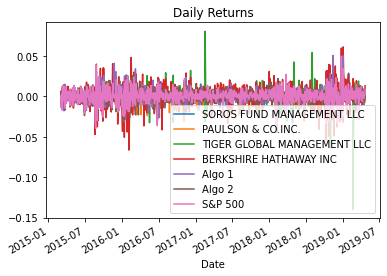

In [78]:
# Plot daily returns
combined_df.plot(title="Daily Returns")

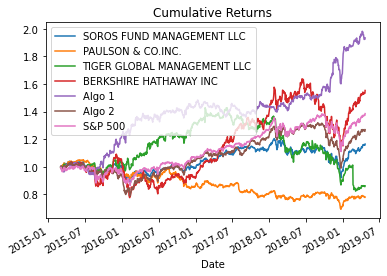

In [77]:
# Plot cumulative returns
# like the $10000 example on Saturday 

cumulative_returns = (1+combined_df).cumprod()

cumulative_returns.plot(title="Cumulative Returns")

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

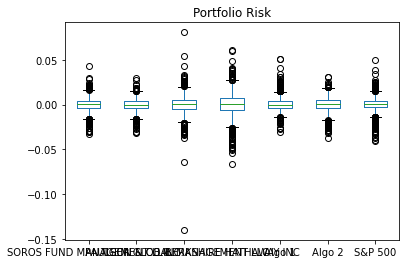

In [17]:
# Box plot to visually show risk 
# YOUR CODE HERE box and whisker plot (look up command for that type of plot)

combined_df.plot.box(title="Portfolio Risk")

In [18]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?

combined_df_std = combined_df.std().sort_values(ascending=True)
print(combined_df_std)

PAULSON & CO.INC.              0.007023
Algo 1                         0.007620
SOROS FUND MANAGEMENT LLC      0.007895
Algo 2                         0.008342
S&P 500                        0.008554
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


In [19]:
# Determine which portfolios are riskier than the S&P 500 

sp500_std=combined_df["S&P 500"].std()
combined_df_std>sp500_std



PAULSON & CO.INC.              False
Algo 1                         False
SOROS FUND MANAGEMENT LLC      False
Algo 2                         False
S&P 500                        False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
dtype: bool

In [20]:
# Calculate the annualized standard deviation (252 trading days)

ann_sd_combined_df = combined_df_std * np.sqrt(252)

ann_sd_combined_df

PAULSON & CO.INC.              0.111488
Algo 1                         0.120967
SOROS FUND MANAGEMENT LLC      0.125335
Algo 2                         0.132430
S&P 500                        0.135786
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                        NaN                 NaN   
2015-03-04                        NaN                 NaN   
2015-03-05                        NaN                 NaN   
2015-03-06                        NaN                 NaN   
2015-03-09                        NaN                 NaN   
...                               ...                 ...   
2019-04-16                   0.006711            0.006224   
2019-04-17                   0.006773            0.006370   
2019-04-18                   0.006633            0.006303   
2019-04-22                   0.005915            0.006400   
2019-04-23                   0.004315            0.005695   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-03                          NaN             

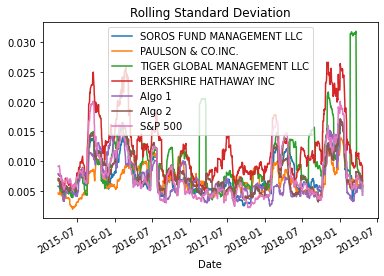

In [21]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
rolling_std_combined_df = combined_df.rolling(window=21).std()
print(rolling_std_combined_df)

rolling_std_combined_df.plot(title="Rolling Standard Deviation")

In [22]:
# Construct a correlation table

combined_df_correlationmatrix= combined_df.corr()
print(combined_df_correlationmatrix)

                             SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.699914   
PAULSON & CO.INC.                             0.699914            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.561243            0.434479   
BERKSHIRE HATHAWAY INC                        0.754360            0.545623   
Algo 1                                        0.321211            0.268840   
Algo 2                                        0.826873            0.678152   
S&P 500                                       0.837864            0.669732   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.561243   
PAULSON & CO.INC.                               0.434479   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.424423   
Algo 1                                          0.164387   
Algo 2         

In [23]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)


cov_soros = combined_df["SOROS FUND MANAGEMENT LLC"].cov(combined_df["S&P 500"])
var_sp500 = combined_df["S&P 500"].var()

beta_soros = cov_soros/var_sp500

beta_soros

0.7733753547794652

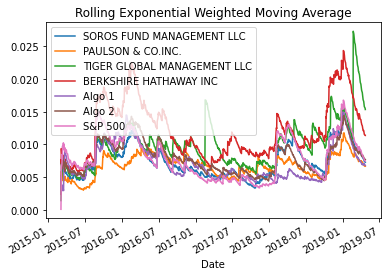

In [76]:
# Calculate a rolling window using the exponentially weighted moving average. 

rolling_expo_average = combined_df.ewm(halflife=21, adjust=True).std()

rolling_expo_average.plot(title="Rolling Exponential Weighted Moving Average")


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [25]:
# Calculate annualized Sharpe Ratios

sharpe_combined_df = (combined_df.mean()*252)/(combined_df.std()*np.sqrt(252))

sharpe_combined_df

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

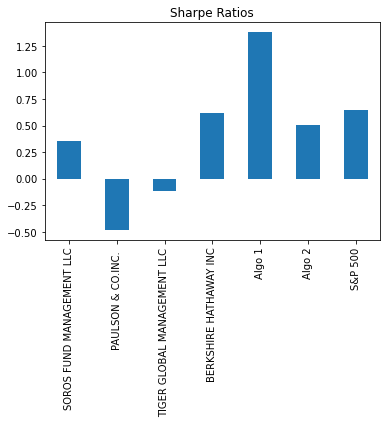

In [26]:
# Visualize the sharpe ratios as a bar plot
sharpe_combined_df.plot(kind="bar", title="Sharpe Ratios")

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [39]:
# Read the first stock
cmg_csv = Path("Resources/CMG.csv")


cmg_df = pd.read_csv(cmg_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
cmg_df.rename(columns={"Close":"CMG"}, inplace=True)

cmg_df.head()

CMG
Date              
2018-04-02  311.16
2018-04-03  316.66
2018-04-04  325.84
2018-04-05  327.71
2018-04-06  318.07

In [40]:
# Read the second stock
cvs_csv = Path("Resources/cvs.csv")


cvs_df = pd.read_csv(cvs_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
cvs_df.rename(columns={"Close":"CVS"}, inplace=True)
cvs_df.head()

CVS
Date             
2018-04-02  61.04
2018-04-03  62.58
2018-04-04  64.28
2018-04-05  64.66
2018-04-06  63.38

In [41]:
# Read the third stock
sbux_csv = Path("Resources/sbux.csv")


sbux_df = pd.read_csv(sbux_csv, index_col = "Date", infer_datetime_format=True, parse_dates=True)
sbux_df.rename(columns={"Close":"SBUX"}, inplace=True)
sbux_df.head()

SBUX
Date             
2018-04-02  56.24
2018-04-03  58.00
2018-04-04  58.83
2018-04-05  59.14
2018-04-06  58.34

In [42]:
# Concatenate all stocks into a single DataFrame
als_port_df=pd.concat([cmg_df, cvs_df, sbux_df], axis ="columns", join="inner")
als_port_df.head()

CMG    CVS   SBUX
Date                            
2018-04-02  311.16  61.04  56.24
2018-04-03  316.66  62.58  58.00
2018-04-04  325.84  64.28  58.83
2018-04-05  327.71  64.66  59.14
2018-04-06  318.07  63.38  58.34

In [43]:
# Reset the index to nothing

#als_port_df= als_port_df.set_index("", inplace=True)

als_port_df.reset_index()

Date      CMG    CVS   SBUX
0   2018-04-02   311.16  61.04  56.24
1   2018-04-03   316.66  62.58  58.00
2   2018-04-04   325.84  64.28  58.83
3   2018-04-05   327.71  64.66  59.14
4   2018-04-06   318.07  63.38  58.34
..         ...      ...    ...    ...
626 2020-09-24  1229.28  56.71  83.04
627 2020-09-25  1244.50  57.32  84.30
628 2020-09-28  1263.35  57.94  86.07
629 2020-09-29  1261.61  57.54  84.80
630 2020-09-30  1243.71  58.40  85.92

[631 rows x 4 columns]

In [44]:
# Pivot so that each column of prices represents a unique symbol

#als_port_df.pivot(index="Date", columns = ("CMG","CVS", "SBUX"))

als_port_pivot = pd.pivot_table(als_port_df, index='Date').sort_index()

als_port_pivot

CMG    CVS   SBUX
Date                             
2018-04-02   311.16  61.04  56.24
2018-04-03   316.66  62.58  58.00
2018-04-04   325.84  64.28  58.83
2018-04-05   327.71  64.66  59.14
2018-04-06   318.07  63.38  58.34
...             ...    ...    ...
2020-09-24  1229.28  56.71  83.04
2020-09-25  1244.50  57.32  84.30
2020-09-28  1263.35  57.94  86.07
2020-09-29  1261.61  57.54  84.80
2020-09-30  1243.71  58.40  85.92

[631 rows x 3 columns]

In [45]:
# Drop Nulls
als_port_pivot.dropna()

CMG    CVS   SBUX
Date                             
2018-04-02   311.16  61.04  56.24
2018-04-03   316.66  62.58  58.00
2018-04-04   325.84  64.28  58.83
2018-04-05   327.71  64.66  59.14
2018-04-06   318.07  63.38  58.34
...             ...    ...    ...
2020-09-24  1229.28  56.71  83.04
2020-09-25  1244.50  57.32  84.30
2020-09-28  1263.35  57.94  86.07
2020-09-29  1261.61  57.54  84.80
2020-09-30  1243.71  58.40  85.92

[631 rows x 3 columns]

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

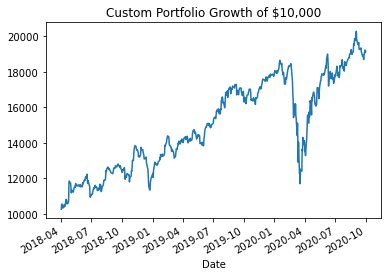

In [75]:
# Calculate weighted portfolio returns use dot functions
weights = [1/3, 1/3, 1/3]
initial_investment = 10000

als_port_returns_df = als_port_pivot.pct_change().dropna()
portfolio_returns = als_port_returns_df.dot(weights)
cumulative_returns = (1 + portfolio_returns).cumprod()
(initial_investment * cumulative_returns).plot(title="Custom Portfolio Growth of $10,000")

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [54]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
whale_personal_combined=pd.concat([portfolio_returns, combined_df], axis ="columns", join="inner")
whale_personal_combined=whale_personal_combined.rename(columns={0:"Custom"})
whale_personal_combined.head()

Custom  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                  
2018-04-03  0.024733                   0.005025            0.006823   
2018-04-04  0.023489                   0.014781            0.003621   
2018-04-05  0.005640                   0.011386            0.003220   
2018-04-06 -0.020913                  -0.015901           -0.011251   
2018-04-09  0.000672                   0.000776            0.002365   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-04-03                     0.006223                0.008499 -0.005030   
2018-04-04                     0.015294                0.006018  0.014715   
2018-04-05                     0.001333                0.005187  0.000218   
2018-04-06                    -0.014487               -0.014856 -0.009878   
2018-04-09                     0.001869                0.000780  0.004021   

              Algo 2   S&P 500  
Date                            
2018-04-03  0.005674  0.012615  
2018-04-04  0.009249  0.011566  
2018-04-05  0.004818  0.006863  
2018-04-06 -0.011514 -0.021920  
2018-04-09 -0.001483  0.003337

In [55]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
whale_personal_combined.dropna()

Custom  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                  
2018-04-03  0.024733                   0.005025            0.006823   
2018-04-04  0.023489                   0.014781            0.003621   
2018-04-05  0.005640                   0.011386            0.003220   
2018-04-06 -0.020913                  -0.015901           -0.011251   
2018-04-09  0.000672                   0.000776            0.002365   
...              ...                        ...                 ...   
2019-04-16 -0.006690                   0.002699            0.000388   
2019-04-17 -0.019585                  -0.002897           -0.006467   
2019-04-18  0.010453                   0.001448            0.001222   
2019-04-22 -0.003364                  -0.002586           -0.007333   
2019-04-23  0.006353                   0.007167            0.003485   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-04-03                     0.006223                0.008499 -0.005030   
2018-04-04                     0.015294                0.006018  0.014715   
2018-04-05                     0.001333                0.005187  0.000218   
2018-04-06                    -0.014487               -0.014856 -0.009878   
2018-04-09                     0.001869                0.000780  0.004021   
...                                 ...                     ...       ...   
2019-04-16                    -0.000831                0.000837 -0.006945   
2019-04-17                    -0.004409                0.003222 -0.010301   
2019-04-18                     0.000582                0.001916 -0.000588   
2019-04-22                    -0.003640               -0.001088  0.000677   
2019-04-23                     0.006472                0.013278  0.004969   

              Algo 2   S&P 500  
Date                            
2018-04-03  0.005674  0.012615  
2018-04-04  0.009249  0.011566  
2018-04-05  0.004818  0.006863  
2018-04-06 -0.011514 -0.021920  
2018-04-09 -0.001483  0.003337  
...              ...       ...  
2019-04-16  0.002899  0.000509  
2019-04-17 -0.005228 -0.002274  
2019-04-18 -0.001229  0.001579  
2019-04-22 -0.001936  0.001012  
2019-04-23  0.009622  0.008841  

[266 rows x 8 columns]

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [57]:
# Risk
whale_personal_combined.std()

Custom                         0.013804
SOROS FUND MANAGEMENT LLC      0.009358
PAULSON & CO.INC.              0.007304
TIGER GLOBAL MANAGEMENT LLC    0.014403
BERKSHIRE HATHAWAY INC         0.014952
Algo 1                         0.008159
Algo 2                         0.008517
S&P 500                        0.009496
dtype: float64

In [59]:
# Rolling
whale_personal_combined.rolling(window=60).std().dropna()

Custom  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                                  
2018-06-26  0.017099                   0.008199            0.005824   
2018-06-27  0.016881                   0.008306            0.005869   
2018-06-28  0.017940                   0.008101            0.005853   
2018-06-29  0.017935                   0.007964            0.005849   
2018-07-02  0.017793                   0.007691            0.005658   
...              ...                        ...                 ...   
2019-04-16  0.010183                   0.007049            0.006369   
2019-04-17  0.010536                   0.006759            0.006229   
2019-04-18  0.010507                   0.006753            0.006229   
2019-04-22  0.010476                   0.006754            0.006253   
2019-04-23  0.010184                   0.006631            0.006119   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2018-06-26                     0.010509                0.009315  0.005061   
2018-06-27                     0.010564                0.009702  0.005226   
2018-06-28                     0.010391                0.009759  0.004920   
2018-06-29                     0.010390                0.009742  0.004924   
2018-07-02                     0.010242                0.009554  0.004715   
...                                 ...                     ...       ...   
2019-04-16                     0.019682                0.010621  0.004922   
2019-04-17                     0.019665                0.010124  0.005111   
2019-04-18                     0.019666                0.010124  0.004979   
2019-04-22                     0.019666                0.010059  0.004961   
2019-04-23                     0.019658                0.009860  0.004993   

              Algo 2   S&P 500  
Date                            
2018-06-26  0.005659  0.007418  
2018-06-27  0.006143  0.007356  
2018-06-28  0.006039  0.007251  
2018-06-29  0.006015  0.007203  
2018-07-02  0.005810  0.006589  
...              ...       ...  
2019-04-16  0.006792  0.006422  
2019-04-17  0.006630  0.006109  
2019-04-18  0.006615  0.006108  
2019-04-22  0.006611  0.006109  
2019-04-23  0.006588  0.006115  

[207 rows x 8 columns]

In [60]:
# Annualized Sharpe Ratios
whale_personal_combined_sharpe = (whale_personal_combined.mean()*252)/(whale_personal_combined.std()*np.sqrt(252))

whale_personal_combined_sharpe

Custom                         1.618637
SOROS FUND MANAGEMENT LLC      0.530082
PAULSON & CO.INC.              0.249079
TIGER GLOBAL MANAGEMENT LLC   -0.913116
BERKSHIRE HATHAWAY INC         0.352993
Algo 1                         2.360148
Algo 2                         0.356808
S&P 500                        0.878099
dtype: float64

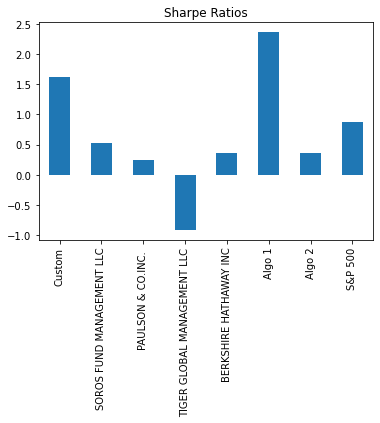

In [61]:
# Visualize the sharpe ratios as a bar plot
whale_personal_combined_sharpe.plot(kind="bar", title="Sharpe Ratios")

In [62]:
# Create a correlation analysis
whale_personal_combined.corr()

Custom  SOROS FUND MANAGEMENT LLC  \
Custom                       1.000000                   0.455207   
SOROS FUND MANAGEMENT LLC    0.455207                   1.000000   
PAULSON & CO.INC.            0.527569                   0.763500   
TIGER GLOBAL MANAGEMENT LLC  0.305936                   0.477320   
BERKSHIRE HATHAWAY INC       0.382586                   0.792615   
Algo 1                       0.170278                   0.329975   
Algo 2                       0.487914                   0.832381   
S&P 500                      0.538927                   0.851304   

                             PAULSON & CO.INC.   TIGER GLOBAL MANAGEMENT LLC  \
Custom                                 0.527569                     0.305936   
SOROS FUND MANAGEMENT LLC              0.763500                     0.477320   
PAULSON & CO.INC.                      1.000000                     0.493403   
TIGER GLOBAL MANAGEMENT LLC            0.493403                     1.000000   
BERKSHIRE HATHAWAY INC                 0.644186                     0.335066   
Algo 1                                 0.349808                     0.120087   
Algo 2                                 0.778422                     0.424409   
S&P 500                                0.771764                     0.501413   

                             BERKSHIRE HATHAWAY INC    Algo 1    Algo 2  \
Custom                                     0.382586  0.170278  0.487914   
SOROS FUND MANAGEMENT LLC                  0.792615  0.329975  0.832381   
PAULSON & CO.INC.                          0.644186  0.349808  0.778422   
TIGER GLOBAL MANAGEMENT LLC                0.335066  0.120087  0.424409   
BERKSHIRE HATHAWAY INC                     1.000000  0.324458  0.783233   
Algo 1                                     0.324458  1.000000  0.363538   
Algo 2                                     0.783233  0.363538  1.000000   
S&P 500                                    0.843016  0.287624  0.874014   

                              S&P 500  
Custom                       0.538927  
SOROS FUND MANAGEMENT LLC    0.851304  
PAULSON & CO.INC.            0.771764  
TIGER GLOBAL MANAGEMENT LLC  0.501413  
BERKSHIRE HATHAWAY INC       0.843016  
Algo 1                       0.287624  
Algo 2                       0.874014  
S&P 500                      1.000000

In [73]:
# Beta

cov_beta = whale_personal_combined["Custom"].cov(whale_personal_combined["S&P 500"])
#cov_paulson = whale_personal_combined["PAULSON & CO.INC."].cov(whale_personal_combined["S&P 500"])
cov_tiger = whale_personal_combined["TIGER GLOBAL MANAGEMENT LLC"].cov(whale_personal_combined["S&P 500"])
cov_bh = whale_personal_combined["BERKSHIRE HATHAWAY INC"].cov(whale_personal_combined["S&P 500"])
cov_algo1 = whale_personal_combined["Algo 1"].cov(whale_personal_combined["S&P 500"])
cov_algo2 = whale_personal_combined["Algo 2"].cov(whale_personal_combined["S&P 500"])

custom_beta = cov_beta/var_sp500
#paulson_beta = cov_paulson/var_sp500
tiger_beta= cov_tiger/var_sp500
bh_beta=cov_bh/var_sp500
algo1_beta= cov_algo1/var_sp500
algo2_beta= cov_algo2/var_sp500

                        
print(f"The Custom portfolio's beta is {custom_beta}")
print(f"The Soros portfolio's beta is {beta_soros}")
print(f"The Tiger Global portfolio's beta is {tiger_beta}")
print(f"Berkshire Hathaway's beta is {bh_beta}")
print(f"The Algo 1 portfolio's beta is {algo1_beta}")
print(f"The Algo 2 portfolio's beta is {algo2_beta}")



KeyError: 'PAULSON & CO.INC.'